# Data Loading

In [1]:
import zipfile

zip_file_path = "cardiovasc-disease-pred.zip"
destination_folder = "raw_files_card"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

## Raw Data Visualization

In [2]:
import pandas as pd

diseases = pd.read_csv("raw_files_card/CVD_cleaned.csv")

diseases.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Exploratory Data Analysis

## Check for Missing Values

Check missing values based on ```diseases.info()``` non null count.

In [3]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

Check missing values based on ```diseases.describe()``` count.

In [4]:
diseases.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Classify the variable to numerical and categorical with ```diseases.select_dtypes()```.

In [5]:
numerical = diseases.select_dtypes(include=['float64'])
categorical = diseases.select_dtypes(include=['object'])

print("There are", len(numerical.columns), "numerical columns")
print("There are", len(categorical.columns), "categorical columns")

There are 7 numerical columns
There are 12 categorical columns


## Check for Outliers

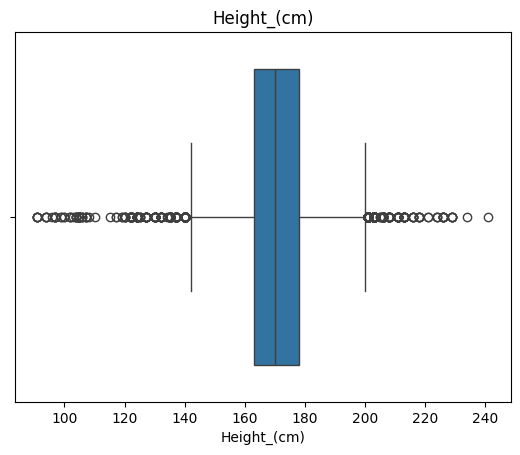

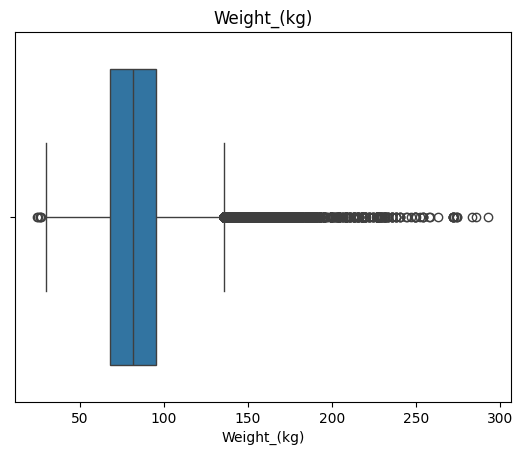

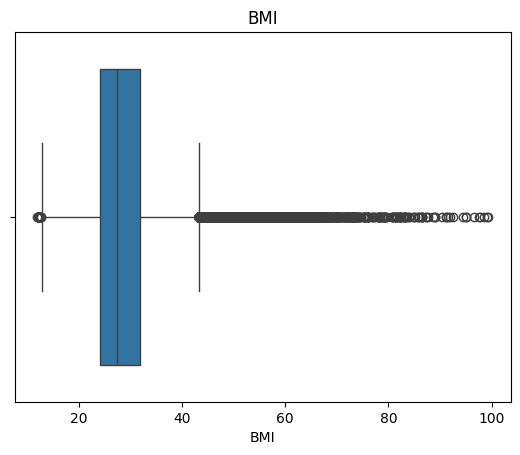

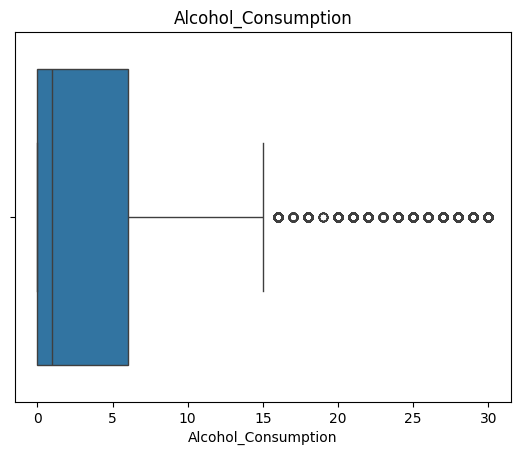

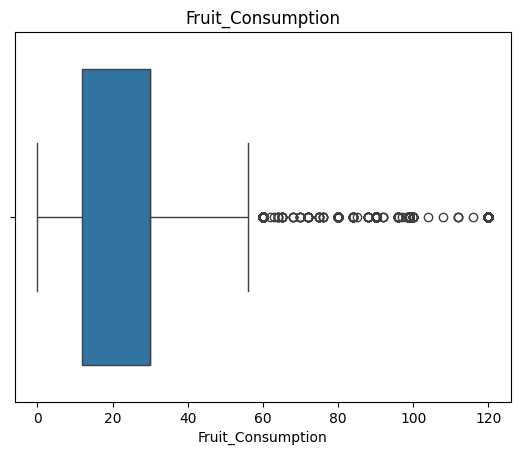

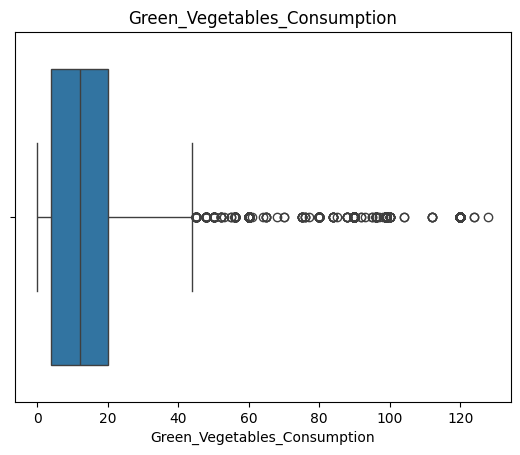

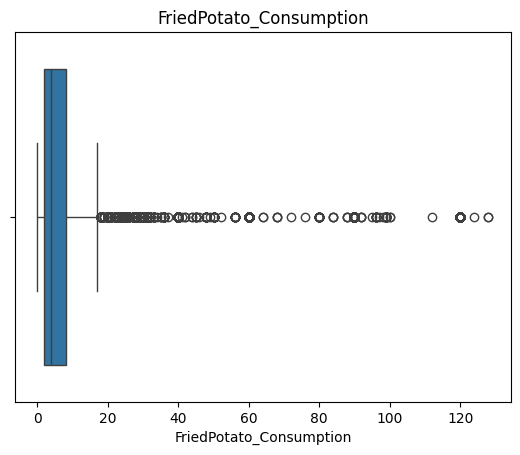

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical.columns:
    plt.title(i)
    sns.boxplot(x=diseases[i])
    plt.show()


## Handle Outliers

Handle outliers with ```IQR``` or ```Interquartile Range``` method.

In [7]:
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1

# Create a filter for rows that have outliers
outlier_filter = ((numerical < (Q1 - 1.5 * IQR)) | (numerical > (Q3 + 1.5 * IQR)))

# Since `outlier_filter` only contains numeric columns, we need to reindex it to match the original DataFrame
outlier_filter = outlier_filter.reindex(diseases.columns, axis=1, fill_value=False)

# Apply the filter to the original DataFrame to remove outliers
diseases = diseases[~(outlier_filter.any(axis=1))]
 
# Cek ukuran dataset setelah kita drop outliers
diseases.shape

(184533, 19)

## Univariate Analysis

### Categorical

                jumlah sampel  persentase
General_Health                           
Very Good               65442        35.5
Good                    58891        31.9
Excellent               31005        16.8
Fair                    22215        12.0
Poor                     6980         3.8


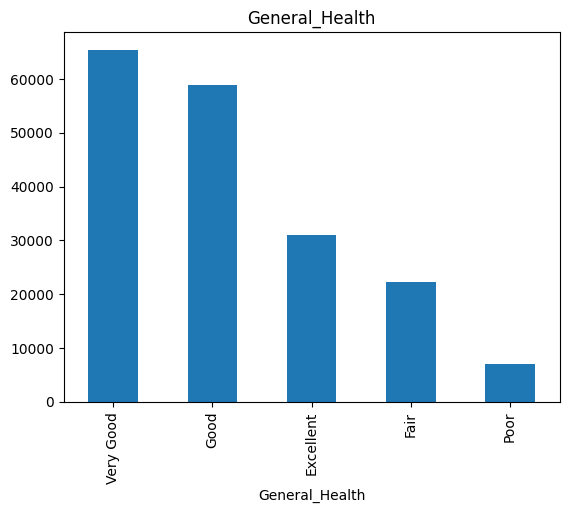

                         jumlah sampel  persentase
Checkup                                           
Within the past year            143312        77.7
Within the past 2 years          22154        12.0
Within the past 5 years          10408         5.6
5 or more years ago               7801         4.2
Never                              858         0.5


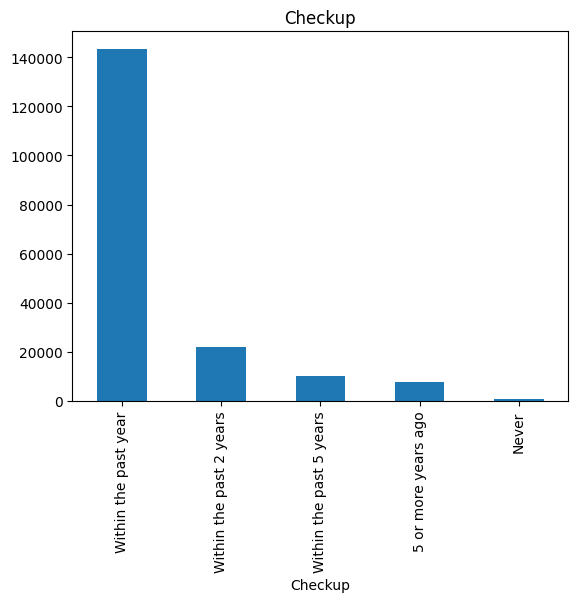

          jumlah sampel  persentase
Exercise                           
Yes              139318        75.5
No                45215        24.5


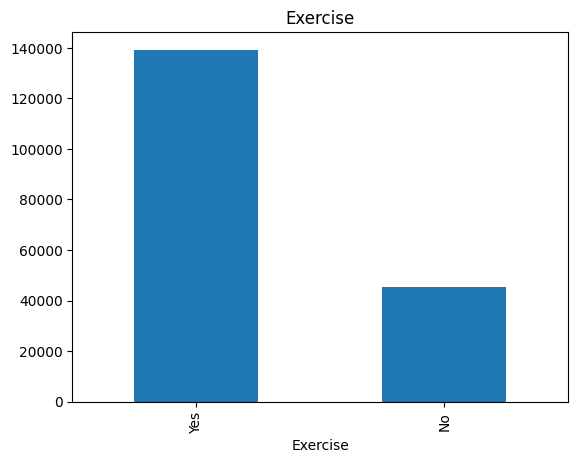

               jumlah sampel  persentase
Heart_Disease                           
No                    168803        91.5
Yes                    15730         8.5


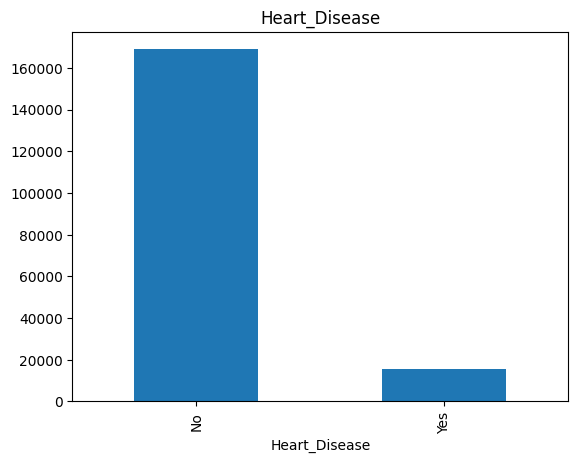

             jumlah sampel  persentase
Skin_Cancer                           
No                  167339        90.7
Yes                  17194         9.3


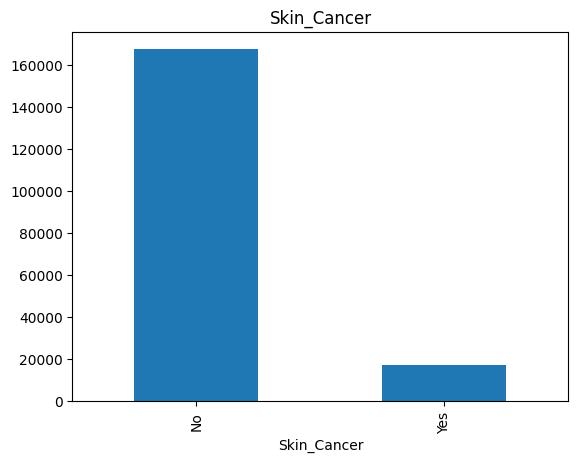

              jumlah sampel  persentase
Other_Cancer                           
No                   166570        90.3
Yes                   17963         9.7


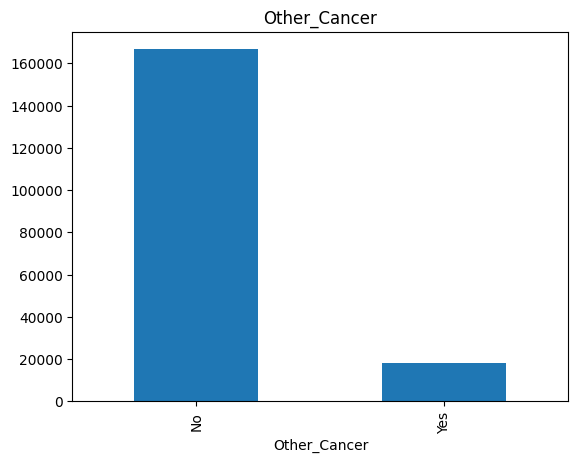

            jumlah sampel  persentase
Depression                           
No                 147740        80.1
Yes                 36793        19.9


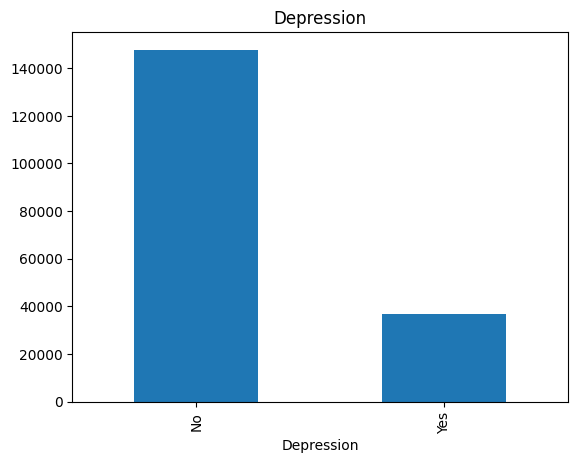

                                            jumlah sampel  persentase
Diabetes                                                             
No                                                 153737        83.3
Yes                                                 24962        13.5
No, pre-diabetes or borderline diabetes              4274         2.3
Yes, but female told only during pregnancy           1560         0.8


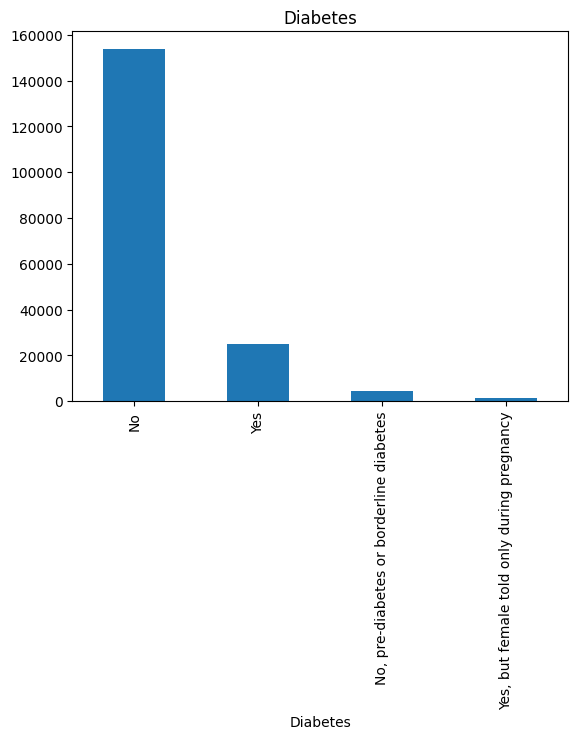

           jumlah sampel  persentase
Arthritis                           
No                124712        67.6
Yes                59821        32.4


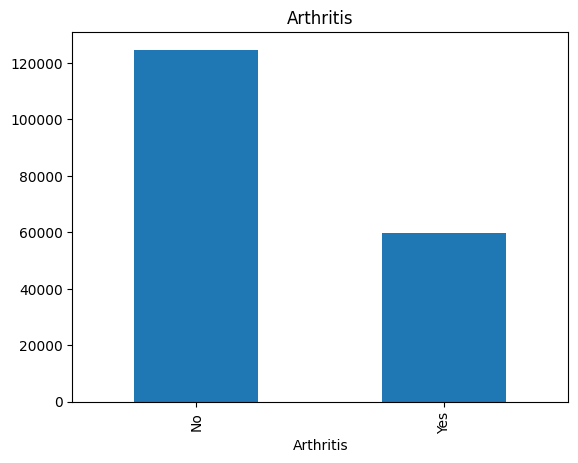

        jumlah sampel  persentase
Sex                              
Female          96241        52.2
Male            88292        47.8


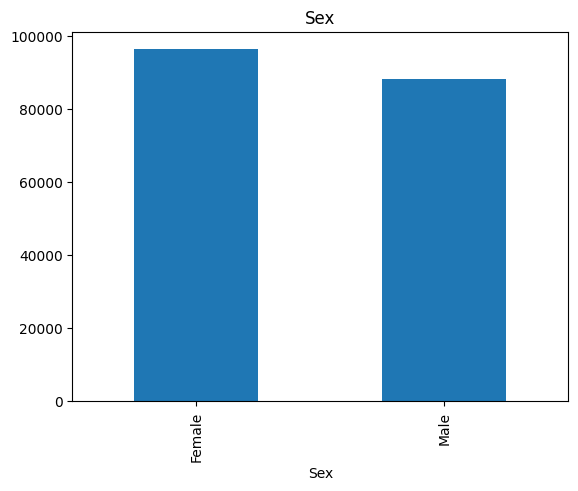

              jumlah sampel  persentase
Age_Category                           
65-69                 19754        10.7
60-64                 19216        10.4
70-74                 18723        10.1
55-59                 16655         9.0
50-54                 14856         8.1
80+                   13778         7.5
75-79                 12508         6.8
45-49                 12311         6.7
40-44                 12248         6.6
18-24                 12208         6.6
35-39                 11792         6.4
30-34                 10898         5.9
25-29                  9586         5.2


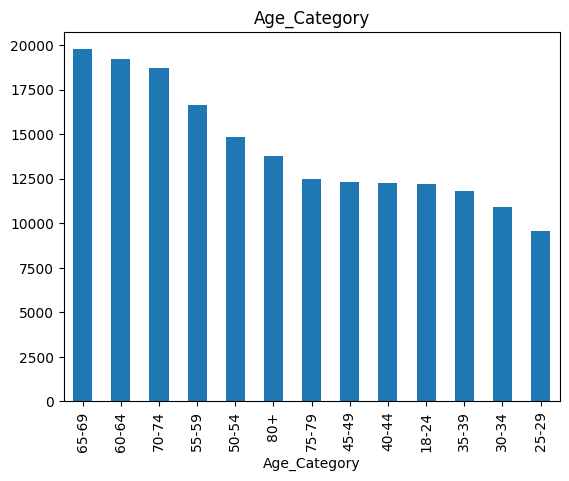

                 jumlah sampel  persentase
Smoking_History                           
No                      110041        59.6
Yes                      74492        40.4


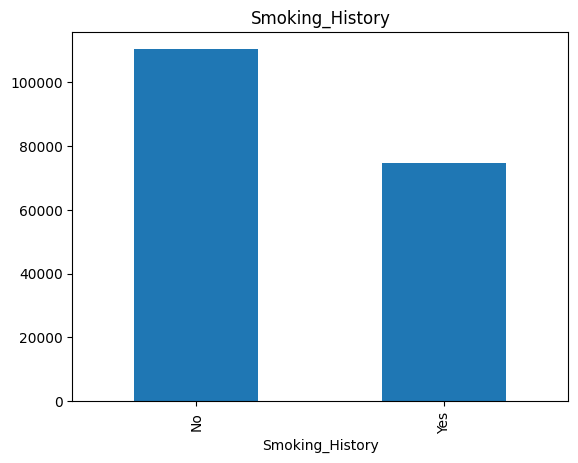

In [8]:
for i in categorical.columns:
    count = diseases[i].value_counts()
    percent = 100*diseases[i].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(df)
    count.plot(kind='bar', title=i)
    plt.show()

### Numerical

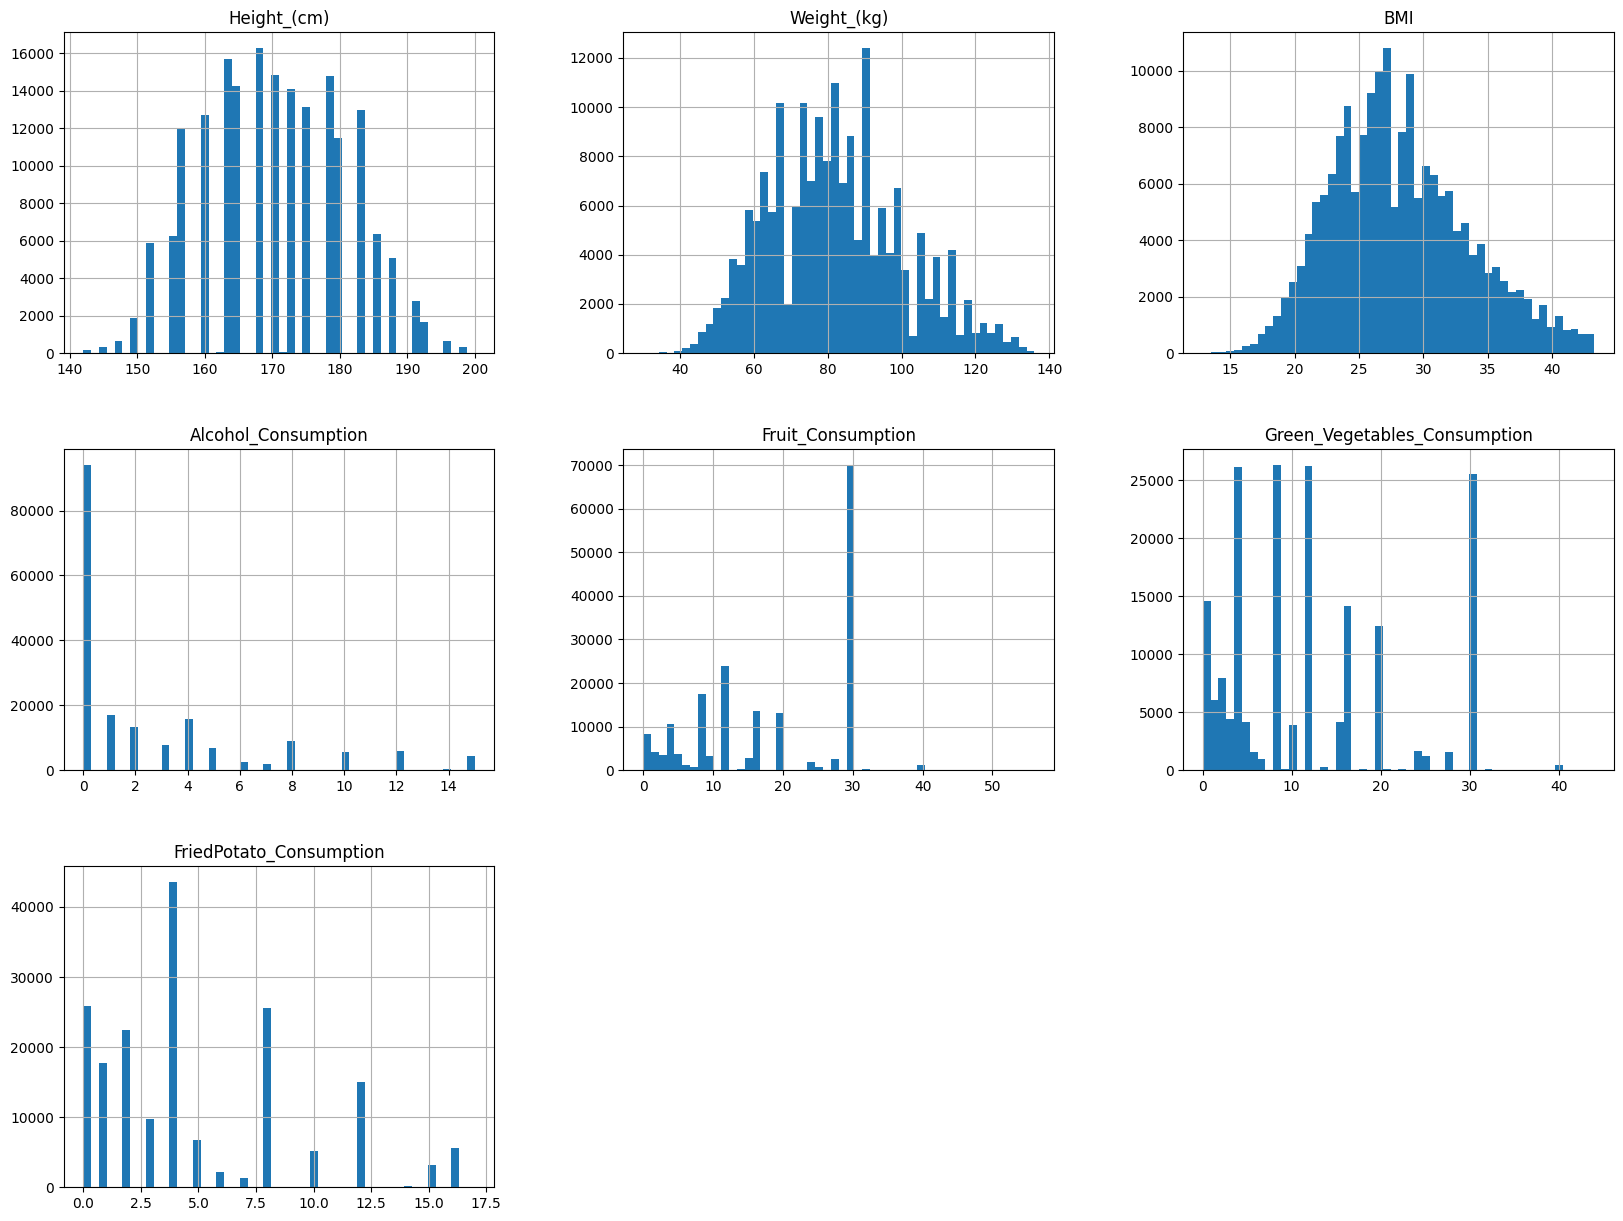

In [9]:
diseases.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

### Categorical

C:\Users\josep\AppData\Local\Temp\ipykernel_7336\2683470260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Heart_Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=diseases, palette="Set3")
C:\Users\josep\AppData\Local\Temp\ipykernel_7336\2683470260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Heart_Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=diseases, palette="Set3")
C:\Users\josep\AppData\Local\Temp\ipykernel_7336\2683470260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catpl

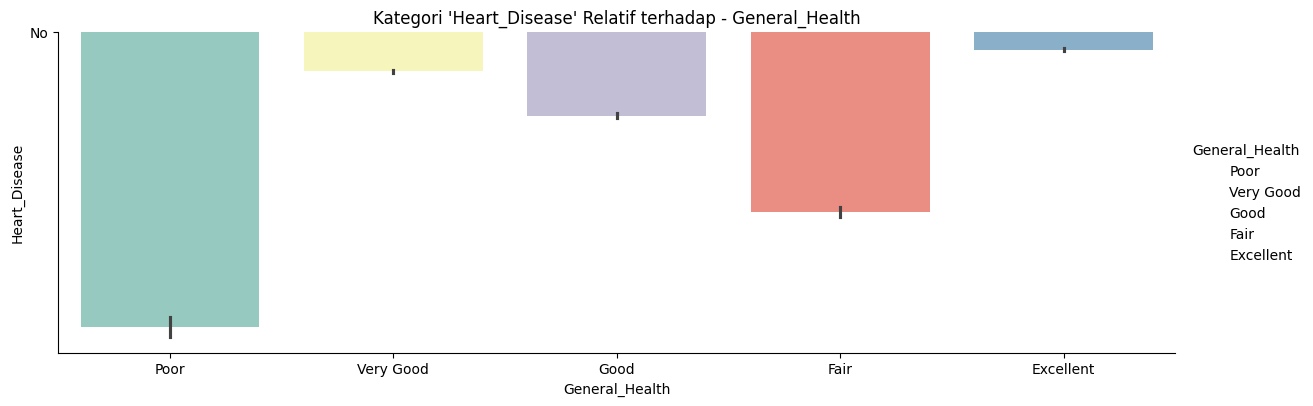

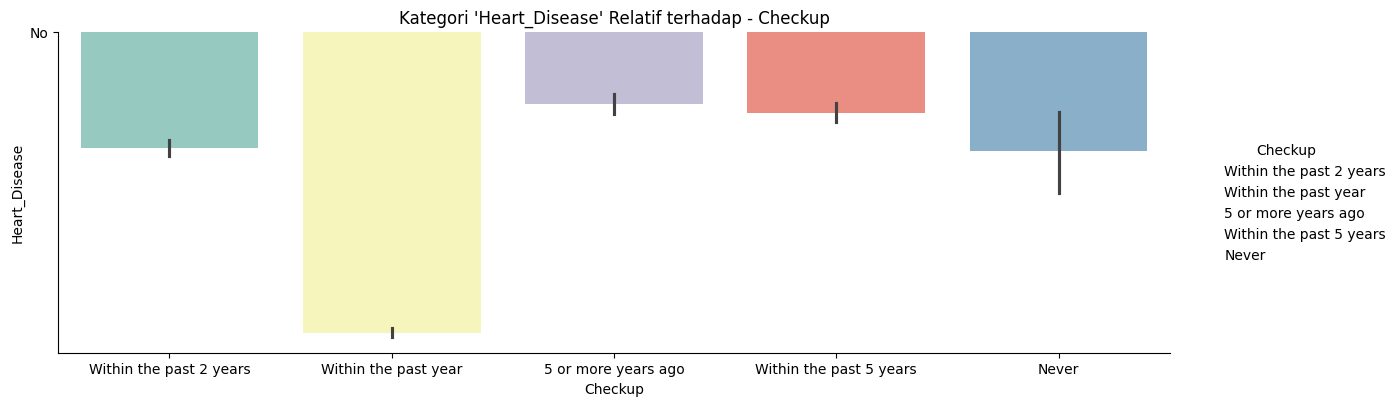

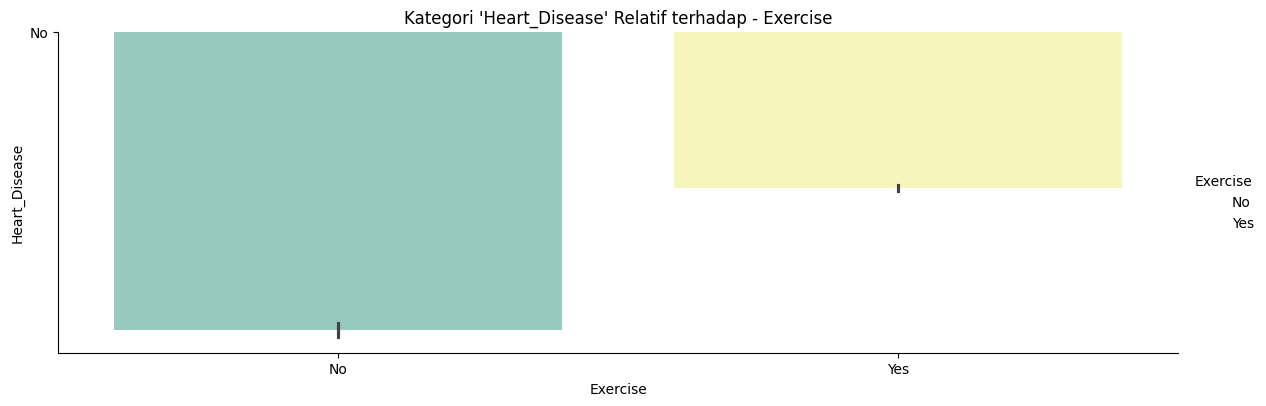

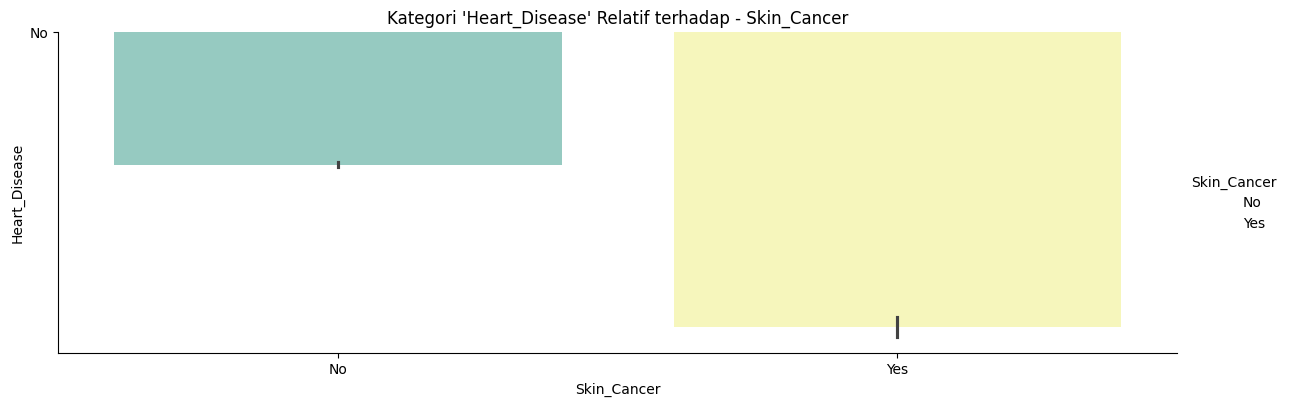

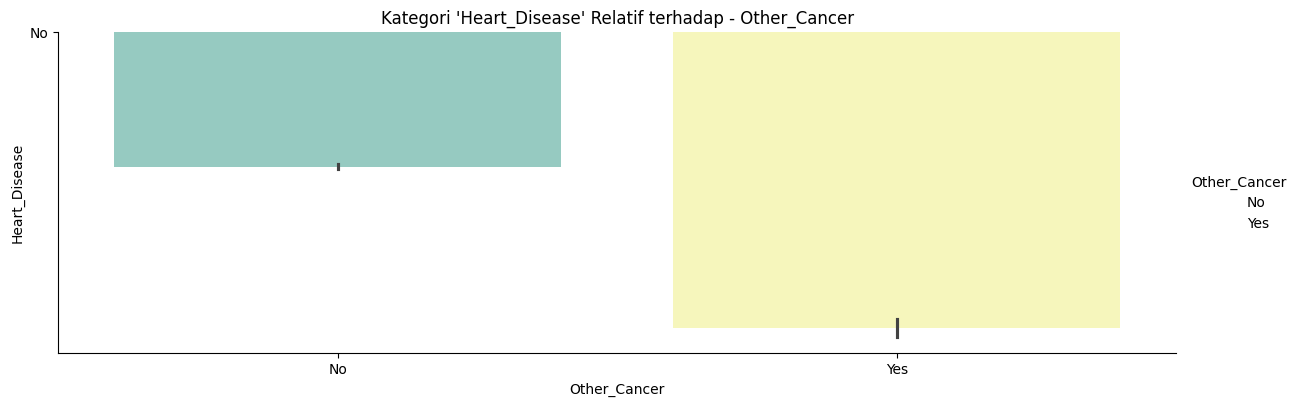

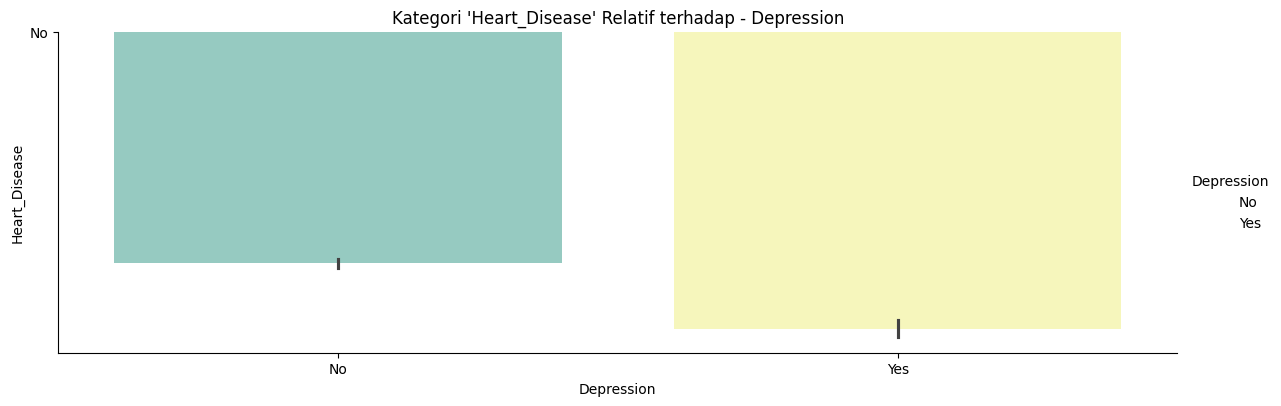

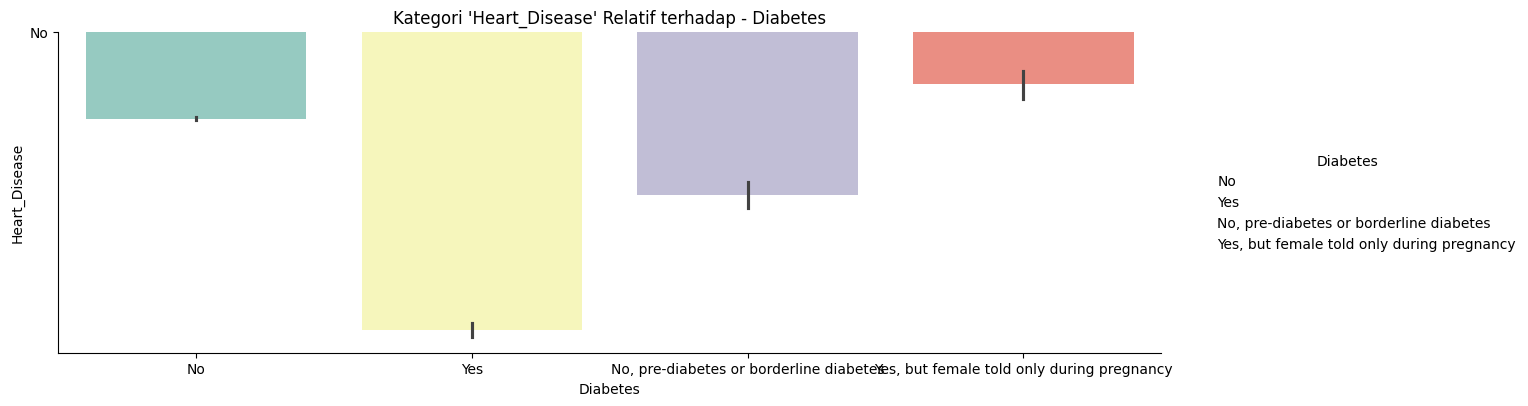

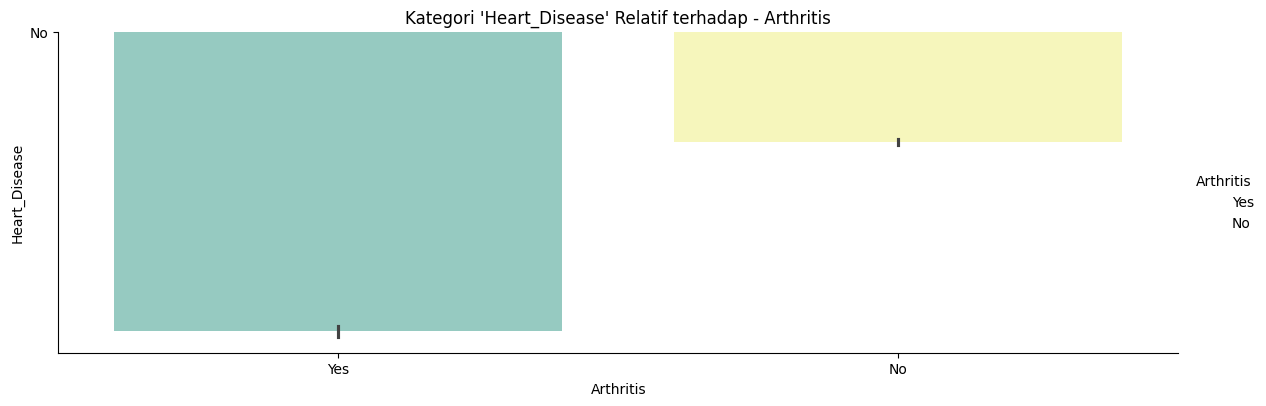

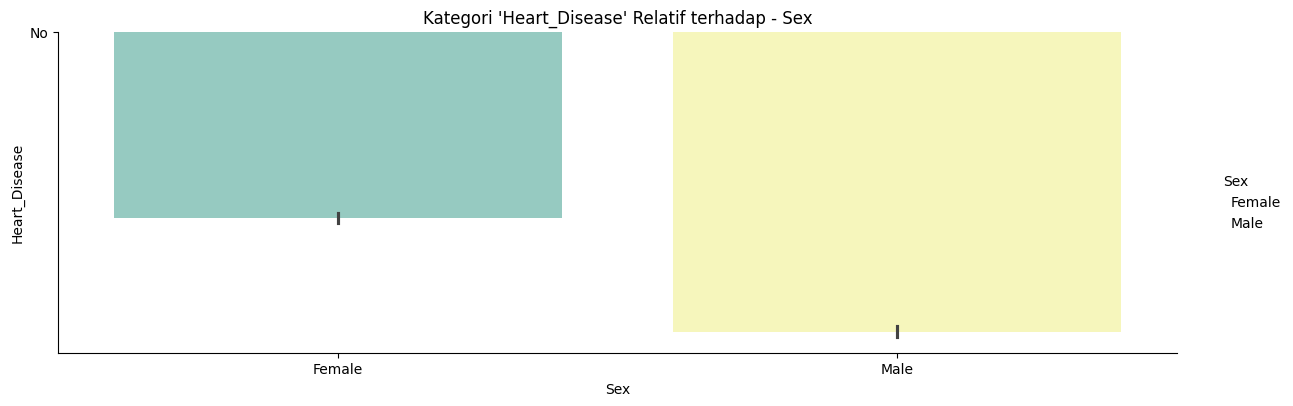

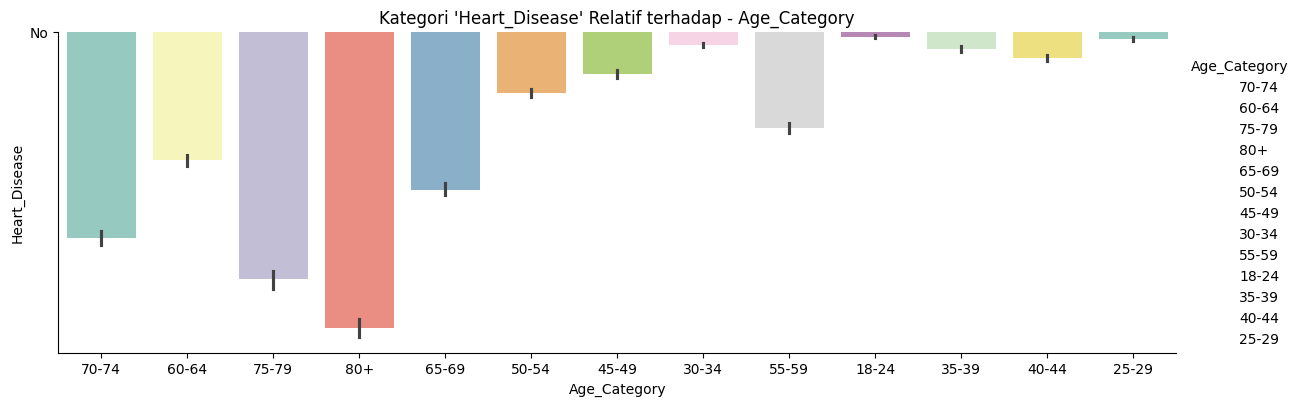

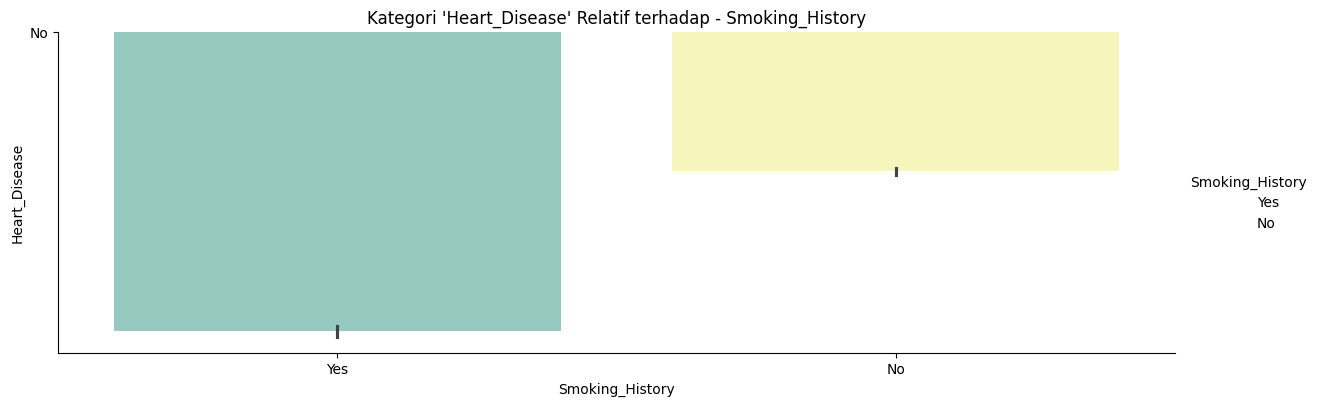

In [10]:
for col in categorical.columns:
  if(col != "Heart_Disease"):
    sns.catplot(x=col, y="Heart_Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=diseases, palette="Set3")
    plt.title("Kategori 'Heart_Disease' Relatif terhadap - {}".format(col))

### Numerical

Numerical Multivariate Analysis with ```pairplot```

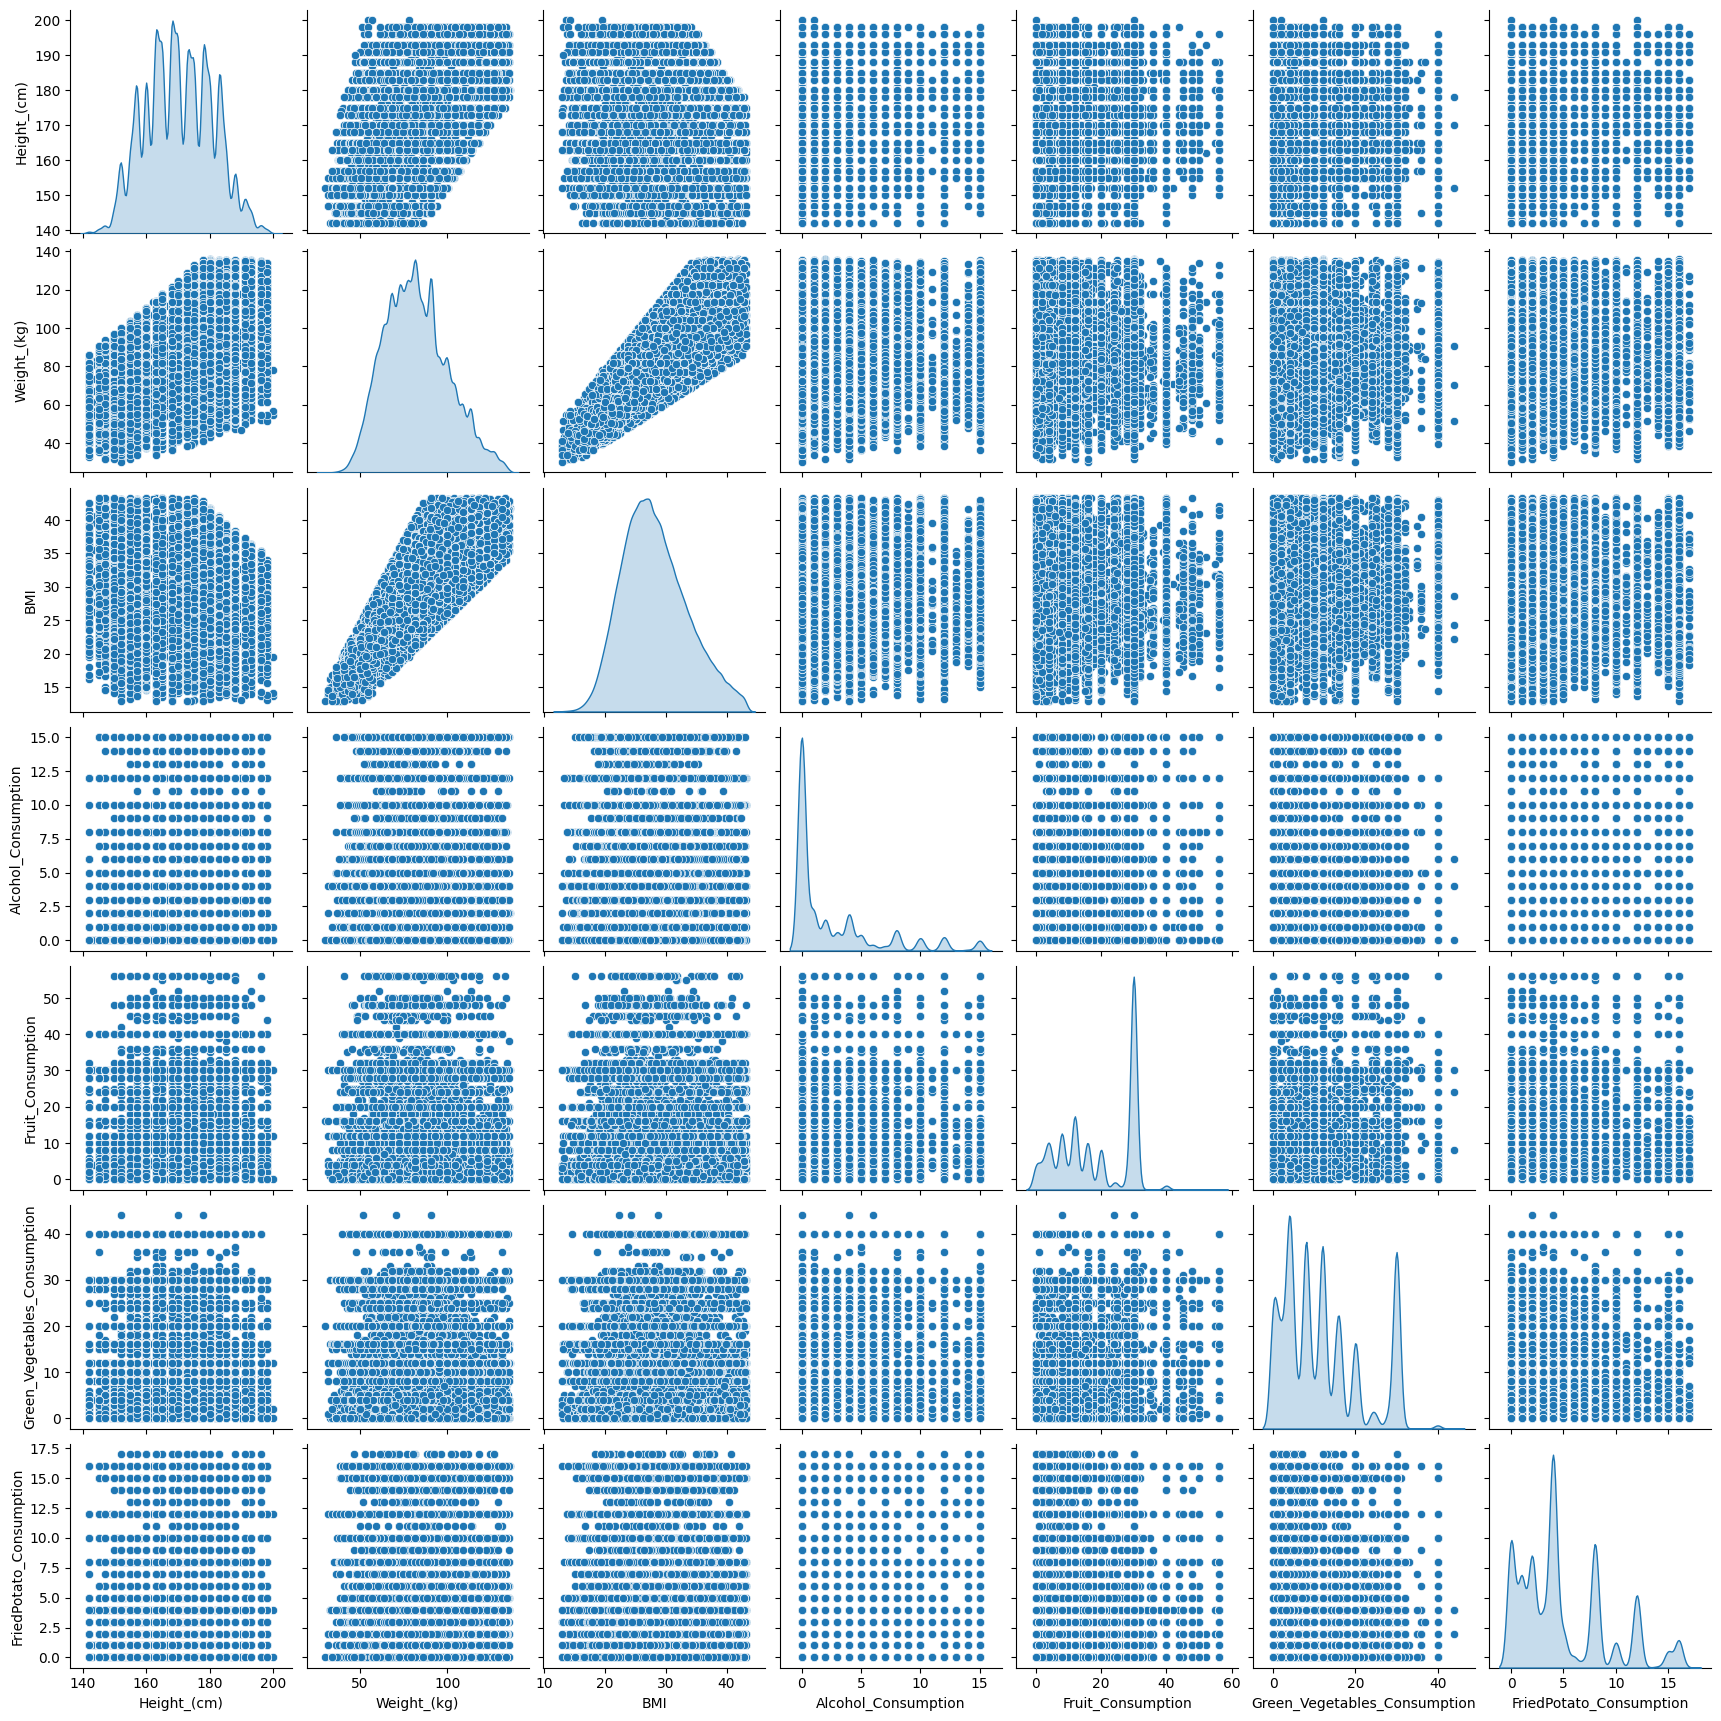

In [11]:
sns.pairplot(diseases, diag_kind = 'kde')

Numerical Multivariate Analysis with ```correlation matrix```

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

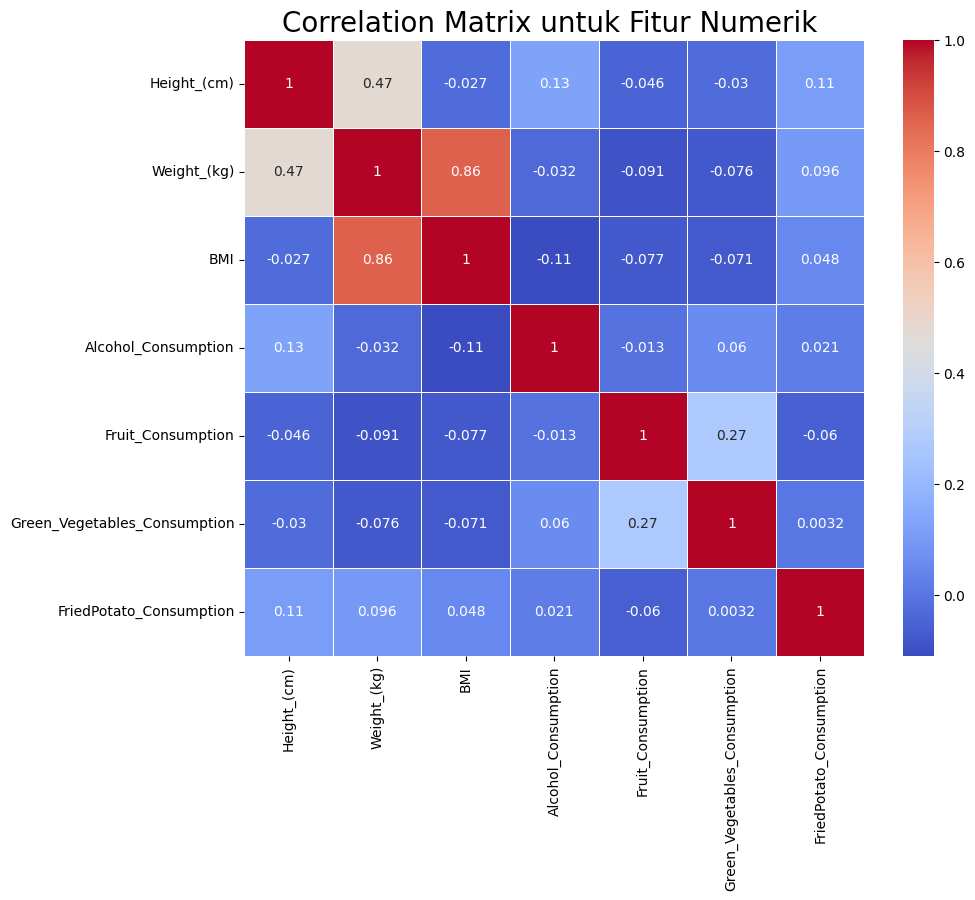

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = numerical.corr()
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

## One Hot Encoding Multivalued Categorical Columns

In [13]:
diseases = pd.concat([diseases, pd.get_dummies(diseases['General_Health'], prefix='gh', dtype=int)],axis=1)
diseases = pd.concat([diseases, pd.get_dummies(diseases['Checkup'], prefix='checkup', dtype=int)],axis=1)
diseases = pd.concat([diseases, pd.get_dummies(diseases['Age_Category'], prefix='ac', dtype=int)],axis=1)
diseases = pd.concat([diseases, pd.get_dummies(diseases['Diabetes'], prefix='d', dtype=int)],axis=1)
diseases.drop(['General_Health','Checkup','Age_Category', 'Diabetes'], axis=1, inplace=True)
diseases.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,ac_55-59,ac_60-64,ac_65-69,ac_70-74,ac_75-79,ac_80+,d_No,"d_No, pre-diabetes or borderline diabetes",d_Yes,"d_Yes, but female told only during pregnancy"
0,No,No,No,No,No,Yes,Female,150.0,32.66,14.54,...,0,0,0,1,0,0,1,0,0,0
1,No,Yes,No,No,No,No,Female,165.0,77.11,28.29,...,0,0,0,1,0,0,0,0,1,0
2,Yes,No,No,No,No,No,Female,163.0,88.45,33.47,...,0,1,0,0,0,0,0,0,1,0
3,Yes,Yes,No,No,No,No,Male,180.0,93.44,28.73,...,0,0,0,0,1,0,0,0,1,0
4,No,No,No,No,No,No,Male,191.0,88.45,24.37,...,0,0,0,0,0,1,1,0,0,0


## Binary Encoding Bi-valued Categorical Columns (Yes / No Columns)

In [14]:
biCategorical = diseases.select_dtypes(include=['object'])

for i in biCategorical.columns:
    if(i == "Sex"):
        diseases[i] = diseases[i].map({'Male':0,'Female':1})
    else:
        diseases[i] = diseases[i].map({'No':0,'Yes':1})
    
diseases.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,ac_55-59,ac_60-64,ac_65-69,ac_70-74,ac_75-79,ac_80+,d_No,"d_No, pre-diabetes or borderline diabetes",d_Yes,"d_Yes, but female told only during pregnancy"
0,0,0,0,0,0,1,1,150.0,32.66,14.54,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,1,165.0,77.11,28.29,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,163.0,88.45,33.47,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,180.0,93.44,28.73,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,191.0,88.45,24.37,...,0,0,0,0,0,1,1,0,0,0


## PCA Dimension Reductibility Test

Dari correlation matrix dapat disimpulkan bahwa ada 3 kandidat berisi data numerik yang berpotensi untuk direduksi dimensi. Diantaranya adalah ```BMI```, ```Weight_(kg)```, dan ```Height_(cm)```

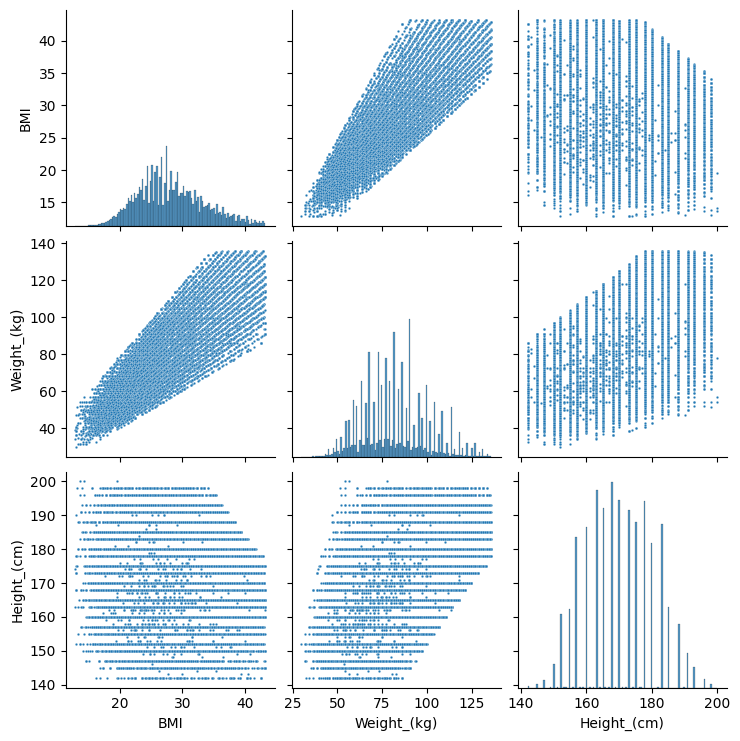

In [15]:
sns.pairplot(diseases[['BMI','Weight_(kg)', 'Height_(cm)']], plot_kws={"s": 3})

Pertama mari kita coba memproses ketiga atribut dan menentukan persentase distribusi fitur

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diseases[['BMI','Weight_(kg)', 'Height_(cm)']])
princ_comp = pca.transform(diseases[['BMI','Weight_(kg)', 'Height_(cm)']])

pca.explained_variance_ratio_.round(3)

array([0.825, 0.174, 0.001])

Arti dari output di atas adalah, 82.5% informasi pada kedua fitur ```BMI```, ```Weight_(kg)```, dan ```Height_(cm)``` terdapat pada PC pertama. 

Selanjutnya, mari kita coba dengan dua atribut berkolerasi paling tinggi (```BMI```, ```Weight_(kg)```)

In [17]:
 
pca = PCA(n_components=2, random_state=123)
pca.fit(diseases[['BMI','Weight_(kg)']])
princ_comp = pca.transform(diseases[['BMI','Weight_(kg)']])

pca.explained_variance_ratio_.round(3)

array([0.977, 0.023])

Arti dari output di atas adalah, 97.7% informasi pada kedua fitur ```BMI```, dan ```Weight_(kg)``` terdapat pada PC pertama.

Oleh karena percobaan pada ```BMI```, dan ```Weight_(kg)``` memiliki persentase penyimpanan fitur lebih tinggi. Sasaran reduksi dimensi adalah kedua atribut ```BMI```, dan ```Weight_(kg)```.

## PCA Dimension Reduction

In [18]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diseases[['BMI','Weight_(kg)']])
diseases['BMI_W'] = pca.transform(diseases.loc[:, ('BMI','Weight_(kg)')]).flatten()
diseases.drop(['BMI','Weight_(kg)'], axis=1, inplace=True)

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
 
X = diseases.drop(["Heart_Disease"], axis=1)
y = diseases["Heart_Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [20]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 184533
Total # of sample in train dataset: 166079
Total # of sample in test dataset: 18454


## Standarization

In [21]:
from sklearn.preprocessing import StandardScaler
 
numerical_columns = diseases.select_dtypes(include=['float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train.loc[:, numerical_columns])
X_train[numerical_columns].head()

,Height_(cm),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_W
210590,-0.512927,-0.399489,-0.591588,-1.030662,-0.678326,-1.154218
204413,1.222785,0.393169,-0.775125,1.885466,-0.913110,0.310121
95434,-0.995069,-0.399489,-0.224513,-0.822367,-0.208759,1.242198
24676,0.451357,0.657388,-0.958662,-0.405777,-0.208759,-0.550555
42803,-0.223642,-0.663709,0.142562,0.010812,-1.147894,1.733893


In [22]:
X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])

# Modelling

In [23]:
from sklearn.metrics import f1_score

models = pd.DataFrame(index=['KNNClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegression'], 
                      columns=['train_f1_score', 'test_f1_score'])

## KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

models.loc['KNNClassifier', 'train_f1_score'] = f1_score(y_train, knn_model.predict(X_train))

## RandomForest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=123)

rf_model.fit(X_train, y_train)

models.loc['RandomForestClassifier', 'train_f1_score'] = f1_score(y_train, rf_model.predict(X_train))

## DecisionTree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

models.loc['DecisionTreeClassifier', 'train_f1_score'] = f1_score(y_train, dt_model.predict(X_train))

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

models.loc['LogisticRegression', 'train_f1_score'] = f1_score(y_train, lr_model.predict(X_train))

c:\Users\josep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

Iterate through all the models, fit all the test dataset, and retrieve the ```test_f1_score```

In [47]:
model_dict = {'KNNClassifier': knn_model, 'RandomForestClassifier': rf_model, 'DecisionTreeClassifier': dt_model, 'LogisticRegression': lr_model}

for name, model in model_dict.items():
    models.loc[name, 'test_f1_score'] = f1_score(y_test, model.predict(X_test))

Model performance in ```f1_score``` numerical visualization

In [48]:
models

,train_f1_score,test_f1_score
KNNClassifier,0.329967,0.169216
RandomForestClassifier,0.999682,0.091774
DecisionTreeClassifier,0.999859,0.21299
LogisticRegression,0.125714,0.104319


Model performance in ```f1_score``` horizontal bar visualization

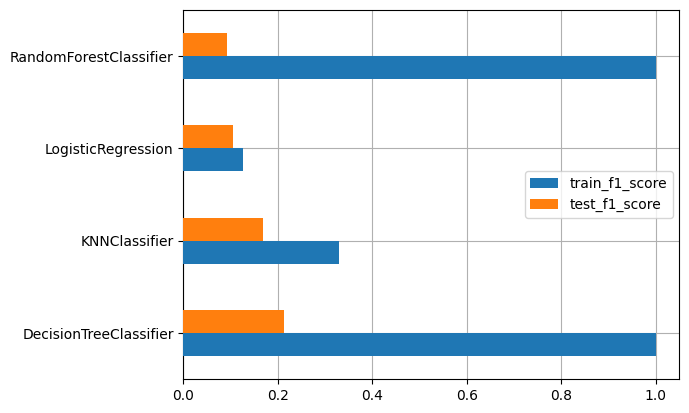

In [49]:
fig, ax = plt.subplots()
models.sort_values(by='test_f1_score', ascending=False).plot(kind='barh', ax=ax, zorder=4)
ax.grid(zorder=0)